In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Ejercicio 1

Reproduzca la figura 4.2 del libro *ISLR*:

*  Estime la probabilidad de `default` mediante un modelo lineal basado en variable `balance`. 
*  Grafique la probabilidad estimada en función de `balance` junto con las observaciones de la muestra.
*  Repita el gráfico para un modelo logístico.

**Sugerencia:** considere el comando `glm` con el argumento `family="binomial"`. ¿Qué significa `family="gaussian"`?


In [36]:
df = pd.read_csv(r"C:\Users\Dell7400\Documents\Ale\Facu\Aprendizaje_Supervisado\Data\df_ej_1.csv")
df.target.value_counts(),df.head()

(0    9667
 1     333
 Name: target, dtype: int64,
   default student      balance        income  target
 0      No      No   729.526495  44361.625074       0
 1      No     Yes   817.180407  12106.134700       0
 2      No      No  1073.549164  31767.138947       0
 3      No      No   529.250605  35704.493935       0
 4      No      No   785.655883  38463.495879       0)

In [37]:
df = df[["balance","income","target"]]

In [72]:
#X_train, X_test, y_train, y_test = train_test_split(df[["balance","income"]], df["target"], test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(df[["balance"]], df["target"], test_size=0.33, random_state=42)

### Sklearn

#### Modelo lineal

In [73]:
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression()

In [165]:
df.columns

Index(['balance', 'income', 'target'], dtype='object')

In [169]:
# R cuadrado
reg.score(X_train, y_train)

0.12775379397155262

In [154]:
reg.predict(X_test),len(X_test),np.mean(reg.predict(X_test)),X_test.shape

(array([ 0.11279974,  0.0251756 , -0.07669226, ..., -0.01257285,
         0.20699699,  0.0359025 ]),
 3300,
 0.03414607422576402,
 (3300, 1))

Text(0.5, 1.0, 'Modelo lineal')

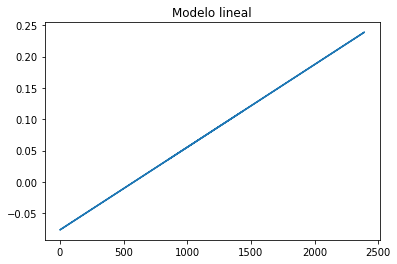

In [82]:
#plt.plot(random.sample(list(reg.predict(X_test)),1000))

plt.plot(X_test,reg.predict(X_test))
plt.title("Modelo lineal")

In [168]:
# Betas

reg.intercept_,reg.coef_

(-0.07669225841961899, array([0.00013199]))

#### Modelo Logistico

In [336]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
    
preds = clf.predict_proba(X_test)
pred_train = clf.predict_proba(X_train)

In [337]:
p1 = []
for x in preds:
    p1.append(x[1])
    
p1train = []    
for x in pred_train:
    p1train.append(x[1])

In [339]:
X_test.shape,len(p1)

((3300, 2), 3300)

Text(0.5, 1.0, 'Modelo logistico')

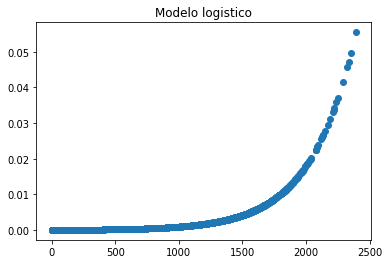

In [343]:
plt.scatter(X_test["balance"],p1)
plt.title("Modelo logistico")

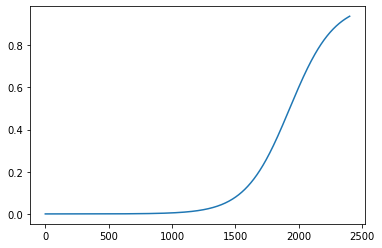

In [330]:
# usando una grilla

a = np.linspace(1, 2400, 500)
preds2 = clf.predict_proba(a.reshape(-1,1))
p11 = []
for x in preds2:
    p11.append(x[1])

plt.plot(a,p11)

#### Modelo lineal

In [259]:
import statsmodels.formula.api as smf
#In [5]: results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()


In [260]:
df_train = X_train
df_train["target"] = y_train
df_test = X_test
df_test["target"] = y_test

In [261]:
df_train.head(),df_test.head()

(          balance  target
 8371     0.000000       0
 5027   491.048506       0
 9234   848.605387       0
 3944  1197.771881       0
 6862   683.997178       0,
           balance  target
 6252  1435.662933       0
 4684   771.789347       0
 1731     0.000000       0
 4742   113.571264       0
 4521  1358.132472       0)

In [266]:
# ver como van los features y el target en el fit, van alreves que el comun

mod = smf.ols("target ~ balance",data=df_train)
mod

In [267]:
res = mod.fit()
res



In [264]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                nan
Time:                        00:12:41   Log-Likelihood:                    inf
No. Observations:               10000   AIC:                              -inf
Df Residuals:                    9998   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\statsmodels\regression\linear_model.py:1804: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


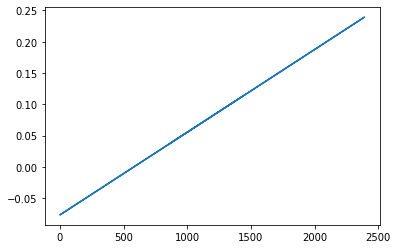

In [268]:
plt.plot(df_test["balance"],res.predict(df_test["balance"]))
#,np.mean(res.predict(X_test)),X_test.shape

#### Modelo logistico

In [255]:
df_train.head()

,balance,target
8371,0.000000,0
5027,491.048506,0
9234,848.605387,0
3944,1197.771881,0
6862,683.997178,0


In [276]:
log_reg = smf.glm("target ~ balance",data = df_train,family=sm.families.Binomial()).fit()
print(log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 6700
Model:                            GLM   Df Residuals:                     6698
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -514.66
Date:                Mon, 29 Nov 2021   Deviance:                       1029.3
Time:                        00:19:57   Pearson chi2:                 6.32e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0355      0.466    -23.665      0.0

In [277]:
a = np.sort(df_test["balance"])
a

array([   0.        ,    0.        ,    0.        , ..., 2332.8782542 ,
       2352.05494932, 2391.00773937])

In [292]:
a = np.linspace(1, 2400, 500)


0         1.000000
1         5.807615
2        10.615230
3        15.422846
4        20.230461
          ...     
495    2380.769539
496    2385.577154
497    2390.384770
498    2395.192385
499    2400.000000
Length: 500, dtype: float64

In [295]:
df__ = pd.DataFrame(a,columns=["balance"])

In [301]:
log_reg.predict(df__["balance"])

0      0.000016
1      0.000017
2      0.000017
3      0.000018
4      0.000018
         ...   
495    0.930676
496    0.932431
497    0.934145
498    0.935818
499    0.937452
Length: 500, dtype: float64

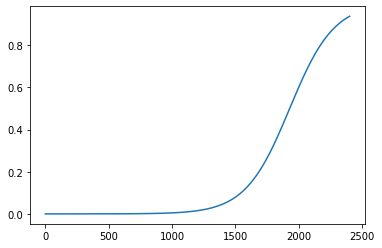

In [302]:
plt.plot(a,log_reg.predict(df__["balance"]))

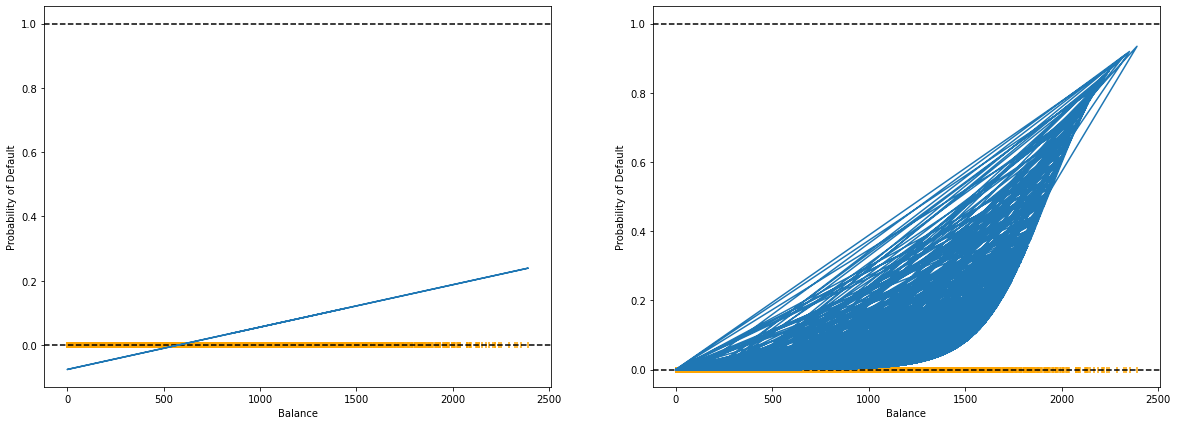

In [325]:
y = np.array(df_test.target)
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
for ax, pred in zip(axs, [res.predict(df_test["balance"]), log_reg.predict(df_test["balance"])]):
    [ax.axhline(y, linestyle="dashed", color="black") for y in (0, 1)]
    ax.scatter(df_test.balance, df_test.target, marker="|", color="orange")
    ax.set_xlabel("Balance")
    ax.set_ylabel("Probability of Default")
    ax.plot(df_test["balance"], pred)
plt.show()


# Ejercicio 3

* Realice un *scatter-plot* de `income` contra `balance` coloreado por `default`. Elija un subconjunto al azar de observaciones para que el gráfico no sea tan pesado.

* Haga un *boxplot* para ambas variables separados por `default`. ¿Qué puede concluir en conjunto con el *scatter-plot*?

* Haga un *barplot* de la variable `default`. ¿Cómo es la relación entre las clases?

In [345]:
df = pd.read_csv(r"C:\Users\Dell7400\Documents\Ale\Facu\Aprendizaje_Supervisado\Data\df_ej_1.csv")
df.head()

,default,student,balance,income,target
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


### Funcion que colorea segun categorica

In [382]:
# Tomo un 50% del data set

X_train, X_test, y_train, y_test = train_test_split(df[["balance","income"]], df["default"], test_size=0.5, random_state=42)

In [383]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='No':
            cols.append('red')
        elif l=='Yes':
            cols.append('blue')
    return cols


In [406]:
cols=pltcolor(list(y_train))

Text(0.5, 1.0, 'income vs balance')

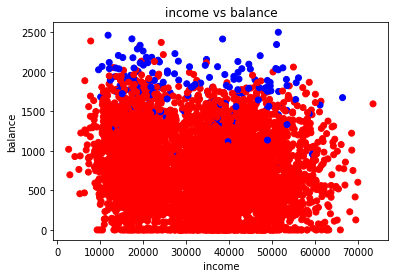

In [408]:
plt.scatter(np.array(X_train.income),np.array(X_train.balance),c=cols)
plt.xlabel("income")
plt.ylabel("balance")
plt.title("income vs balance")

### Boxplot

Haga un *boxplot* para ambas variables separados por `default`. ¿Qué puede concluir en conjunto con el *scatter-plot*?


In [400]:
df.columns

Index(['default', 'student', 'balance', 'income', 'target'], dtype='object')

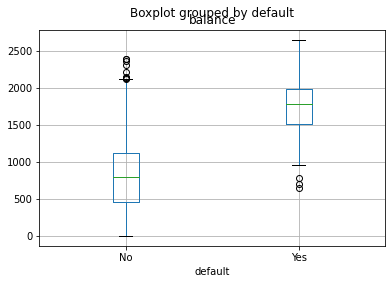

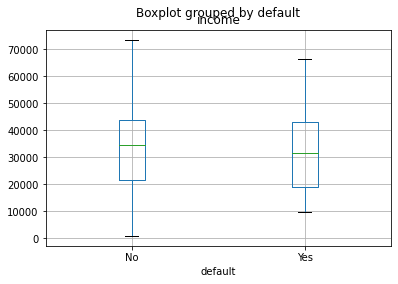

In [399]:
for h in [df.columns[2],df.columns[3]]:
    df.boxplot(h,by="default")

* Conclusion:
Mirando los datos, pareciera que la variable income no sera un gran predictor, en scatter plot y boxplot se la ve uniforme con respecto al default

### Barplot

* Haga un *barplot* de la variable `default`. ¿Cómo es la relación entre las clases?

In [420]:
[(df.default == x).mean() for x in df.default.unique()]

#[(df.tramo==tname).mean() for tname in tnames]

[0.9667, 0.0333]

In [423]:
(df.default == "No").mean()

0.9667

In [415]:
df.groupby("default").income.mean()

default
No     33566.166625
Yes    32089.147124
Name: income, dtype: float64

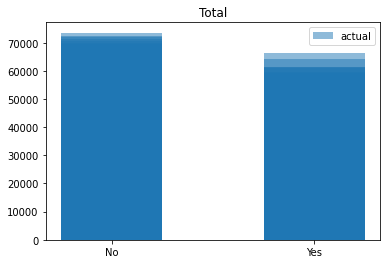

In [425]:
#plt.bar(tnames, [df_tramo_total_with_preds["tier_{}_prob_adjusted".format(tname)].mean() for tname in tnames], alpha=0.5, label="pred")
plt.bar(df.default,df.income, alpha=0.5, width=0.5, label="actual")
plt.title("Total")
plt.legend()
plt.show()

(array([9667.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         333.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

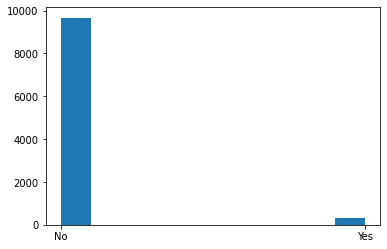

In [409]:
plt.hist(df.default)

# Ejercicio 4

* Defina un conjunto de entrenamiento y otro de testeo para los próximos ejecicios.
* Agregue al *scatter-plot* del ejercicio anterior las regiones de clasificación y frontera de decisión provista por un  clasificador basado en el 
  * modelo lineal 
  * modelo logístico 
  * método de vecinos más cercanos

¿Cómo son las fronteras de decisión en sendos casos?

**Sugerencia**: para graficar las regiones de clasificación puede armar una grilla y clasificar todos sus puntos.

In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#### Creo funcion que grafica frontera de decision

In [722]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC

def frontera(df,clasificador:str):

    X = df[["balance","income"]].values
    Y = df["target"].values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.7, random_state=42)

    lista_clasificadores = [LogisticRegression,RandomForestClassifier,LinearRegression,SVC]

    if clasificador == "svm":
        clf = SVC(kernel='linear', random_state=0)    
    if clasificador == "reglogistica":
        clf = LogisticRegression(max_iter=300)
    if clasificador == "reglineal":
        clf = LinearRegression()
    if clasificador == "randomforest":
        clf = RandomForestClassifier()
    if clasificador == "knn":        
        clf = KNeighborsClassifier(n_neighbors=4)


    clf.fit(X_Train, Y_Train)
    from sklearn.preprocessing import StandardScaler

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)



    # Visualizando los resultados en el set de entrenamiento
    from matplotlib.colors import ListedColormap

    X_Set, Y_Set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(12,8))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = [ListedColormap(('red', 'green'))(i)], label = j)
        plt.title(f'{clasificador.upper()} Frontera de decision', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()


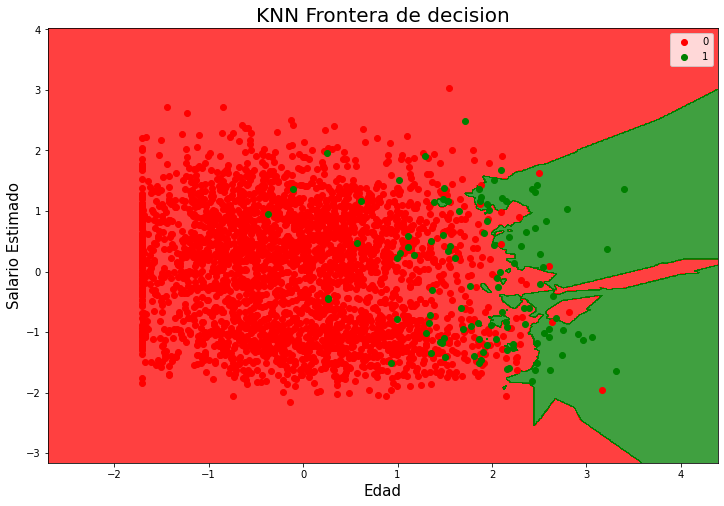

In [723]:
frontera(df,"knn")

## Ejercicio 5

* Implemente una función que dado un vector de predicciones y las etiquetas verdaderas calcule la matriz de confusión.
* Para el clasificador logístico, usando el conjunto de testeo,
  * calcule el accuracy,
  * grafique la curva ROC.
* Repita el punto anterior para la familia de  clasificadores que deciden al azar con probabilidad $p \in [0,1]$.

**Sugerencia:** para graficar la curva ROC defina una función auxiliar que compute la tasa de *true positives* y *false negatives* para un umbral (*threshold*) dado.

Esta funcion recibe

* preds = vector de probabilidades P(Y=1)
* y_test = verdadero valor de la variable respuesta en conjunto de testing o cualquier otro
* cut_points = punto de coret el cual si preds>=cut_point entonces el clasificador vale 1 

obs: Es necesario que len(preds)=len(y_test)

In [724]:
def arma_metricas(preds,y_test,cut_point:float):
    a= np.where(preds>=cut_point,1,0)
    df_ = pd.DataFrame(a,columns=["etiqueta"])
    df_["y_test"] = list(y_test)
    tp = np.where((df_.etiqueta==1)&(df_.y_test==1),1,0)
    tn = np.where((df_.etiqueta==0)&(df_.y_test==0),1,0)
    fp = np.where((df_.etiqueta==1)&(df_.y_test==0),1,0)
    fn = np.where((df_.etiqueta==0)&(df_.y_test==1),1,0)
    tp = sum(tp)
    tn = sum(tn)
    fp = sum(fp)
    fn = sum(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*((precision*recall)/(precision+recall))
    fnr = fn/(fn+tn)
    return precision,recall,f1,fnr

In [ ]:
grilla = np.linspace(0,0.95,500)
for h in [preds_logistica,preds_randomforest]:
    prec=[]
    rec=[]
    f1=[]

    esp=[]
    sen=[]
    for x in grilla:
        a = arma_metricas(h,y_test,x)[0]
        b = arma_metricas(h,y_test,x)[1]
        c = arma_metricas(h,y_test,x)[2]
        d = arma_metricas(h,y_test,x)[3]
        e = arma_metricas(h,y_test,x)[4]
        f = arma_metricas(h,y_test,x)[5]
        prec.append(a)
        rec.append(b)
        f1.append(c)
        # para la curva ROC
        esp.append(1-e) # 1- especificidad
        sen.append(f) # sensibilidad
    plt.plot(grilla,rec,label="recall")
    plt.plot(grilla,prec,label="precision")
    plt.plot(grilla,f1,label="f1 score")
    plt.plot(esp,sen,label="roc")
    plt.xlabel("Punto de corte")
    plt.ylabel("Valor Metrica")
    plt.gca().legend(('recall','precision',"f1 score","roc"))
    plt.show()